In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('chicag daily.csv')

In [54]:
data.shape

(3773, 2)

In [55]:
data.head()

daily    f0_
0  2013-01-01  56953
1  2013-01-02  36830
2  2013-01-03  38808
3  2013-01-04  50391
4  2013-01-05  48352

In [56]:
data.tail()

daily    f0_
3768  2023-04-27  23188
3769  2023-04-28  22088
3770  2023-04-29  16106
3771  2023-04-30  16228
3772  2023-05-01     44

In [57]:
data.rename(columns = {'f0_':'Trips'}, inplace = True)

In [58]:
data.rename(columns = {'daily':'Date'}, inplace = True)

In [59]:
data.head()

Date  Trips
0  2013-01-01  56953
1  2013-01-02  36830
2  2013-01-03  38808
3  2013-01-04  50391
4  2013-01-05  48352

In [60]:
data.tail()

Date  Trips
3768  2023-04-27  23188
3769  2023-04-28  22088
3770  2023-04-29  16106
3771  2023-04-30  16228
3772  2023-05-01     44

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3773 non-null   object
 1   Trips   3773 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.1+ KB


In [62]:
data.Date = pd.to_datetime(data.Date, errors = 'coerce')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3773 non-null   datetime64[ns]
 1   Trips   3773 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.1 KB


<Axes: >

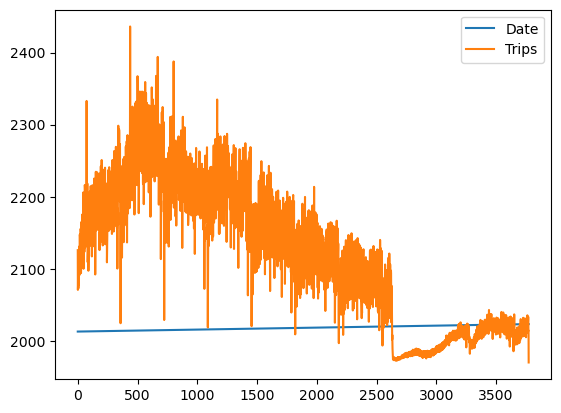

In [64]:
data.plot(kind='line')

In [65]:
data.index = data.Date

In [66]:
data = data.drop("Date",axis = 1)

<Axes: xlabel='Date'>

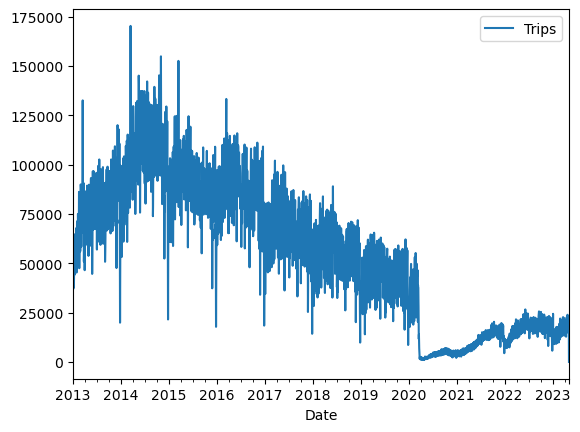

In [67]:
data.plot(kind='line')

In [68]:
data = data.reset_index()

In [69]:
yearly = pd.pivot_table(data,
                         values='Date',
                         index = pd.Grouper(freq = 'A',key='Date'),aggfunc='sum')

# freq = 'A' - Annual, 'M' - Monthly, 'Q' - Quarterly, 'D' - Daily
# aggfunc = "mean", "sum", "median", "sd"

In [70]:
yearly.head()

Trips
Date                
2013-12-31  27217029
2014-12-31  37394851
2015-12-31  32385354
2016-12-31  31756080
2017-12-31  24979023

<Axes: xlabel='Date'>

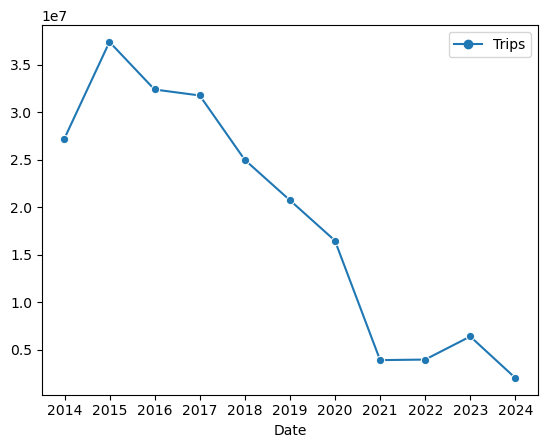

In [71]:
#yearly.plot(kind='line')

sns.lineplot(yearly,markers=True)

In [72]:
yearly = yearly.reset_index()

In [73]:
yearly

Date     Trips
0  2013-12-31  27217029
1  2014-12-31  37394851
2  2015-12-31  32385354
3  2016-12-31  31756080
4  2017-12-31  24979023
5  2018-12-31  20729811
6  2019-12-31  16474869
7  2020-12-31   3888499
8  2021-12-31   3947073
9  2022-12-31   6378538
10 2023-12-31   2014610

In [74]:
data.rename(columns = {'f0_':'Trips'}, inplace = True)

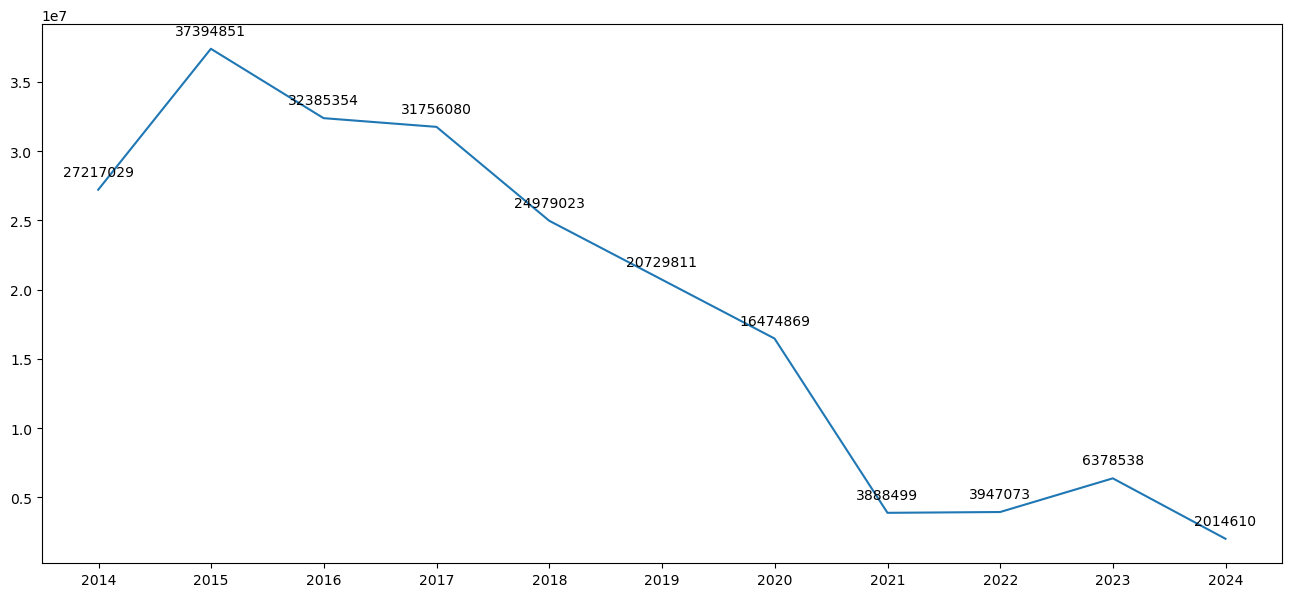

In [75]:
plt.figure(figsize=(16,7))
plt.plot(yearly.Date,yearly.Trips)

for x, y in zip(yearly.Date, yearly.Trips):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")

In [76]:
yearly_quarter = pd.pivot_table(data,
                         values='Date',
                         index = pd.Grouper(freq = 'Q',key='Date'),aggfunc='sum')

In [77]:
yearly_quarter

Trips
Date                
2013-03-31   5651487
2013-06-30   6764016
2013-09-30   7055671
2013-12-31   7745855
2014-03-31   8086517
2014-06-30  10029049
2014-09-30   9967480
2014-12-31   9311805
2015-03-31   8351312
2015-06-30   8737220
2015-09-30   7883913
2015-12-31   7412909
2016-03-31   7929870
2016-06-30   8555237
2016-09-30   7844952
2016-12-31   7426021
2017-03-31   6242762
2017-06-30   6840527
2017-09-30   6081334
2017-12-31   5814400
2018-03-31   5204888
2018-06-30   5757622
2018-09-30   4954459
2018-12-31   4812842
2019-03-31   4041602
2019-06-30   4481450
2019-09-30   3998424
2019-12-31   3953393
2020-03-31   2752604
2020-06-30    230091
2020-09-30    436312
2020-12-31    469492
2021-03-31    510974
2021-06-30    832522
2021-09-30   1232777
2021-12-31   1370800
2022-03-31   1190811
2022-06-30   1756302
2022-09-30   1769631
2022-12-31   1661794
2023-03-31   1445027
2023-06-30    569583

In [78]:
yearly_quarter = yearly_quarter.reset_index()

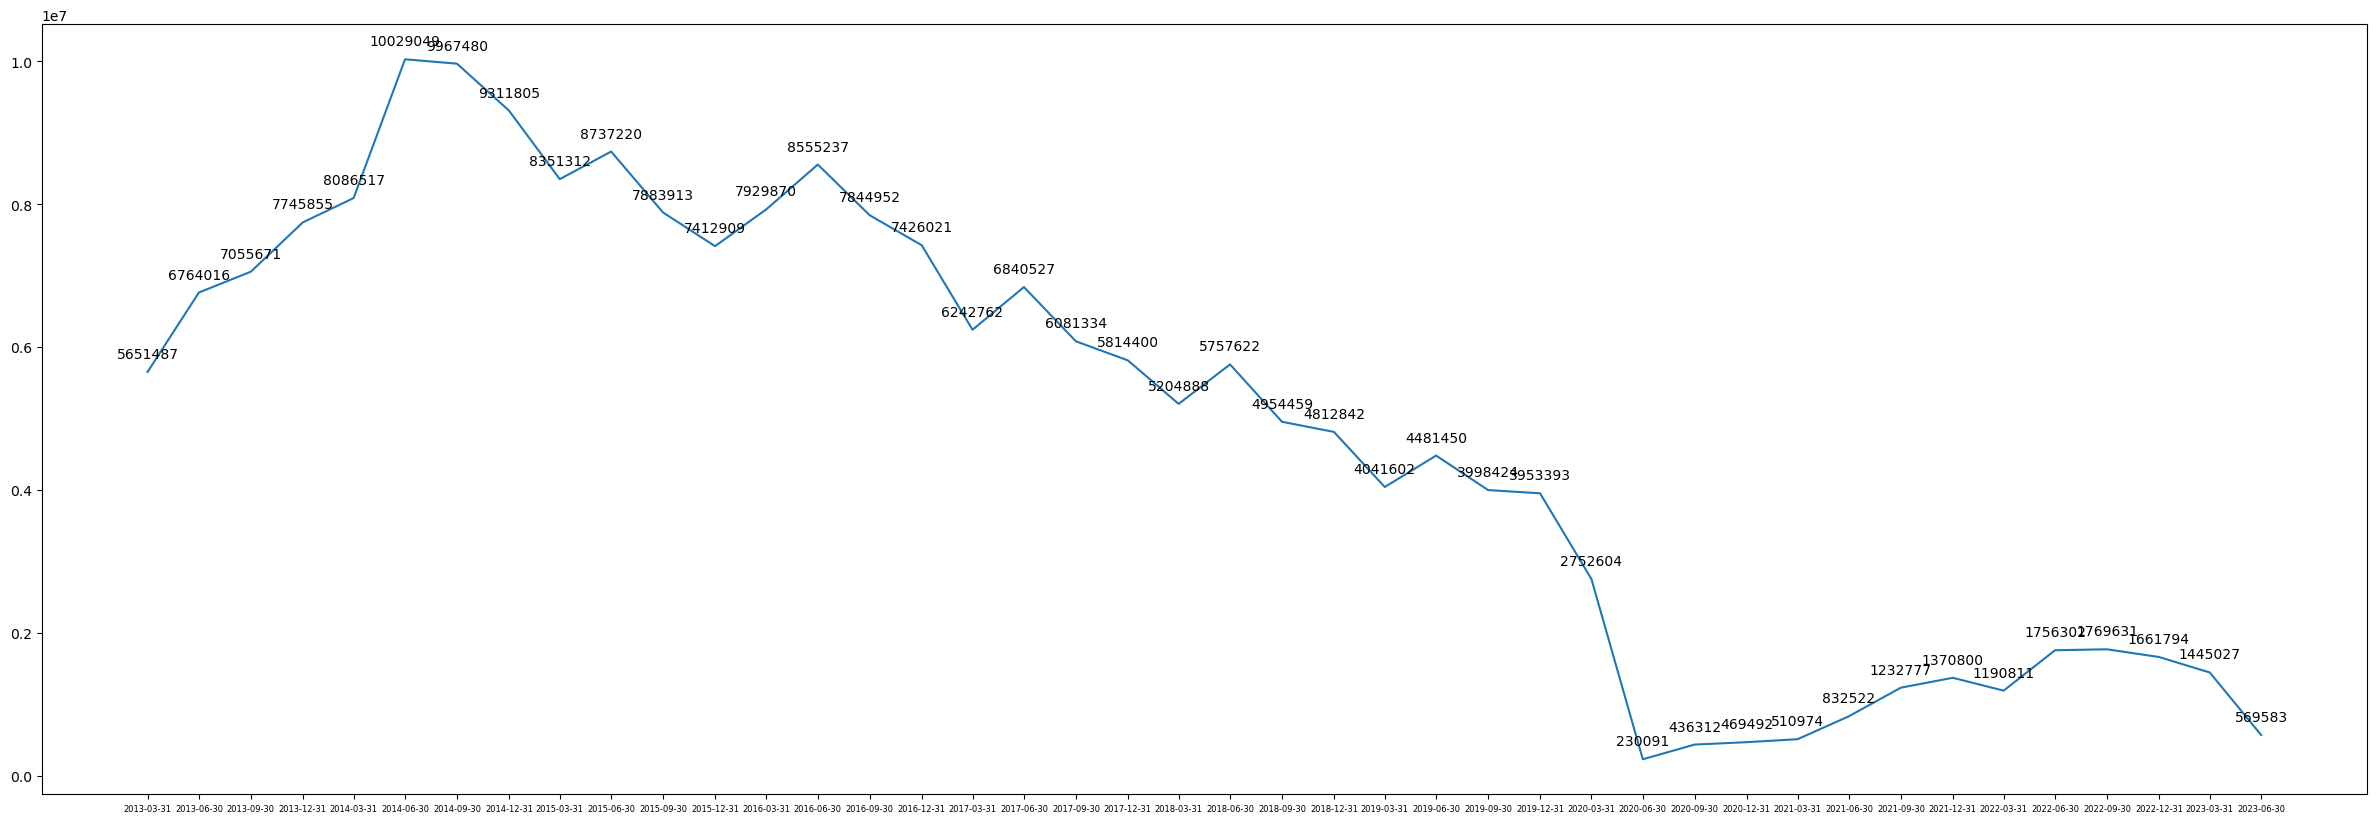

In [79]:
plt.figure(figsize=(30,10))
plt.plot(yearly_quarter.Date,yearly_quarter.Trips)

for x, y in zip(yearly_quarter.Date, yearly_quarter.Trips):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")
    plt.xticks(yearly_quarter.Date,fontsize = 6)

In [80]:
data

Date  Trips
0    2013-01-01  56953
1    2013-01-02  36830
2    2013-01-03  38808
3    2013-01-04  50391
4    2013-01-05  48352
...         ...    ...
3768 2023-04-27  23188
3769 2023-04-28  22088
3770 2023-04-29  16106
3771 2023-04-30  16228
3772 2023-05-01     44

[3773 rows x 2 columns]

In [81]:
data.index = data.Date

In [82]:
data = data.drop('Date',axis = 1)

<Axes: xlabel='Date'>

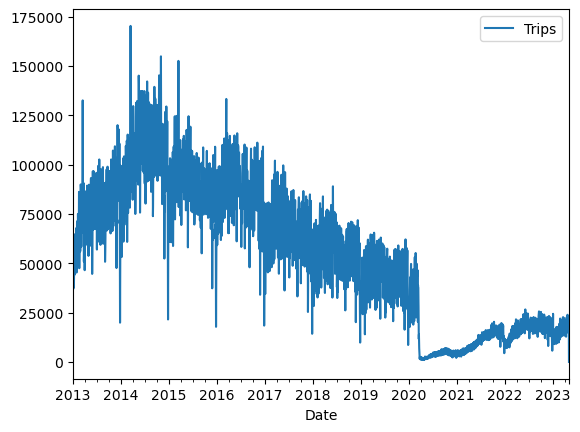

In [83]:
data.plot(kind = 'line')

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adfuller(data)

(-0.8449318458264299,
 0.8055662136210677,
 30,
 3742,
 {'1%': -3.432098741718118,
  '5%': -2.8623126975788264,
  '10%': -2.5671813176558236},
 75811.60639161228)

In [86]:
from statsmodels.tsa.stattools import kpss

In [87]:
kpss(data)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(8.471009687129213,
 0.01,
 38,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [88]:
data_diff = data.diff()

In [89]:
data_diff.head()

Trips
Date               
2013-01-01      NaN
2013-01-02 -20123.0
2013-01-03   1978.0
2013-01-04  11583.0
2013-01-05  -2039.0

In [90]:
data_diff = data_diff.dropna()

<Axes: xlabel='Date'>

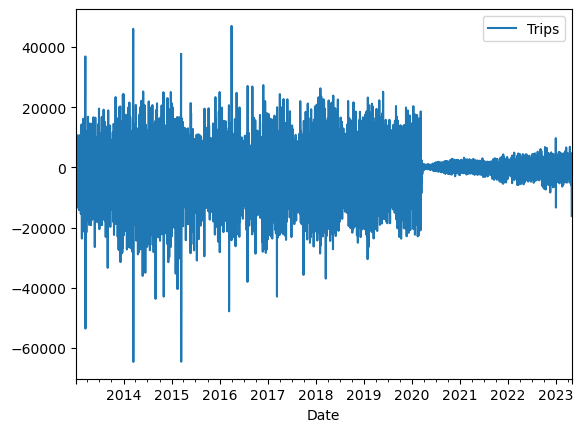

In [91]:
data_diff.plot(kind='line')

In [92]:
adfuller(data_diff)

(-17.364971169055657,
 5.177495704866976e-30,
 30,
 3741,
 {'1%': -3.43209920949247,
  '5%': -2.8623129042084874,
  '10%': -2.5671814276580465},
 75783.13327351694)

In [93]:
kpss(data_diff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0888730765221346,
 0.1,
 77,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

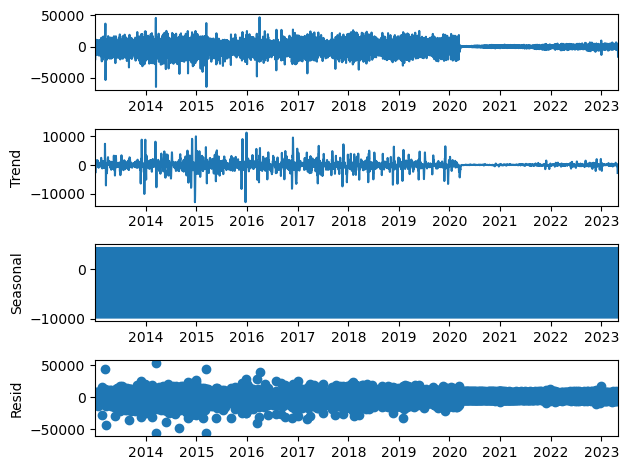

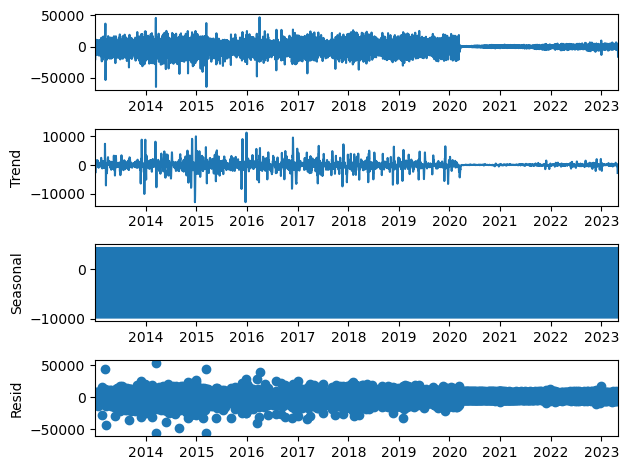

In [95]:
seasonal_decompose(data_diff).plot()

In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

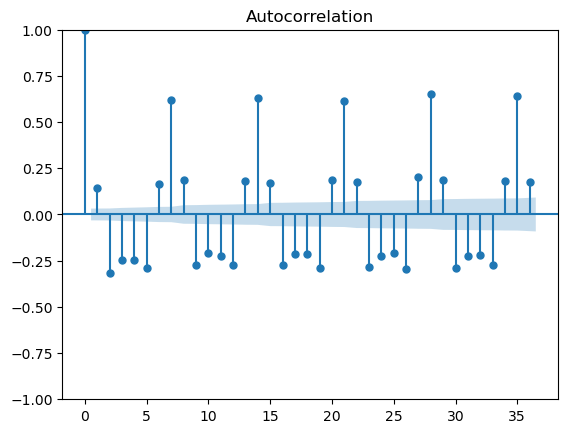

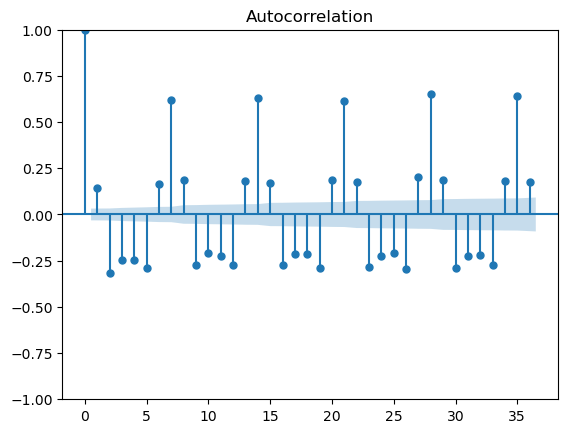

In [97]:
plot_acf(data_diff)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


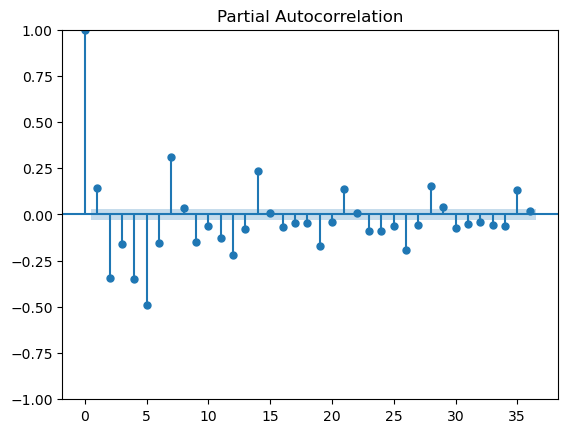

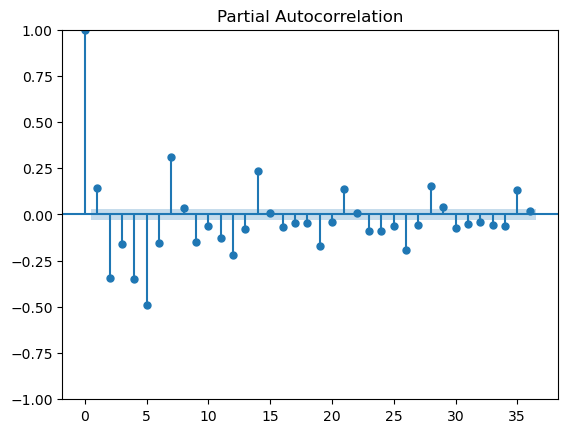

In [98]:
plot_pacf(data_diff)

In [99]:
from pmdarima.arima import auto_arima

In [100]:
arima_model = auto_arima(data,max_p=10,max_q=10 , stationary=False)

In [101]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3773
Model:               SARIMAX(6, 1, 6)   Log Likelihood              -38196.189
Date:                Sun, 17 Sep 2023   AIC                          76420.379
Time:                        19:26:21   BIC                          76507.674
Sample:                    01-01-2013   HQIC                         76451.415
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -32.8700     19.617     -1.676      0.094     -71.319       5.579
ar.L1          0.5417      0.017     31.126      0.000       0.508       0.576
ar.L2         -0.5332      0.026    -20.813      0.000      -0.583      -0.483
ar.L3         -0.1366      0.032     -4.325      0.000      -0.198      -0.075
ar.L4          0.2218      0.033      6.744      0.000       0.157       0.286
ar.L5         -0.8169      0.025    -32.948      0.000      -0.866      -0.768
ar.L6          0.6986      0.019     37.057      0.000       0.662       0.736
ma.L1         -0.7575      0.015    -50.644      0.000      -0.787      -0.728
ma.L2          0.4438      0.025     17.761      0.000       0.395       0.493
ma.L3          0.0201      0.030      0.682      0.495      -0.038       0.078
ma.L4         -0.4090      0.029    -14.097      0.000      -0.466      -0.352
ma.L5          0.7404      0.022     33.175      0.000       0.697       0.784
ma.L6         -0.8842      0.014    -62.392      0.000      -0.912      -0.856
sigma2      4.375e+07      0.000   2.63e+11      0.000    4.38e+07    4.38e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             21108.44
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.43e+25. Standard errors may be unstable.
"""

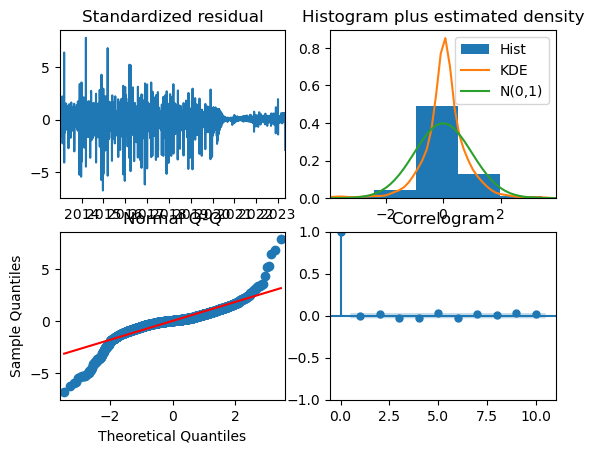

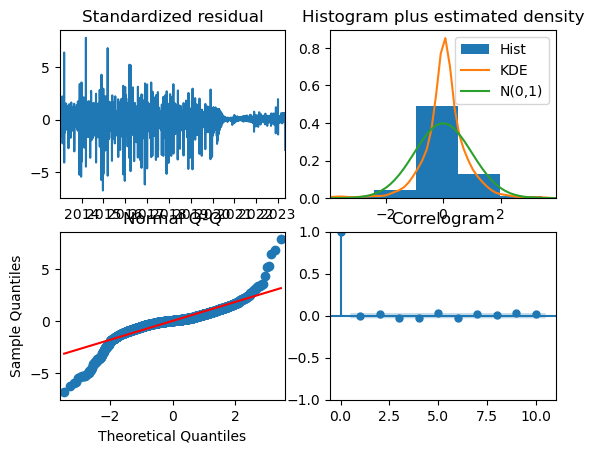

In [102]:
arima_model.plot_diagnostics()

In [103]:
taxipredict = pd.DataFrame(arima_model.predict(n_periods=120))

In [104]:
index_of_fc = pd.date_range(data.index[-1],periods=120,freq="M")

In [105]:
taxipredict = pd.DataFrame(taxipredict)

In [106]:
taxipredict.index = index_of_fc

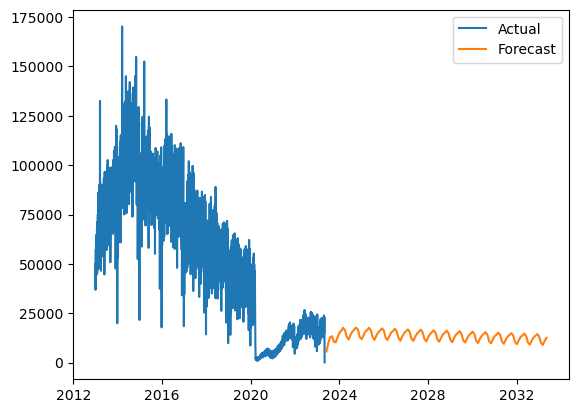

In [107]:
plt.plot(data,label="Actual")
plt.plot(taxipredict,label="Forecast")
plt.legend()
plt.show()

In [108]:
from prophet import Prophet

In [109]:
data = data.reset_index()

In [110]:
data.columns = ['ds','y']

In [111]:
m = Prophet()
m.fit(data)

19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:24 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
future = m.make_future_dataframe(periods=24,freq='M')

In [113]:
forecast = m.predict(future)

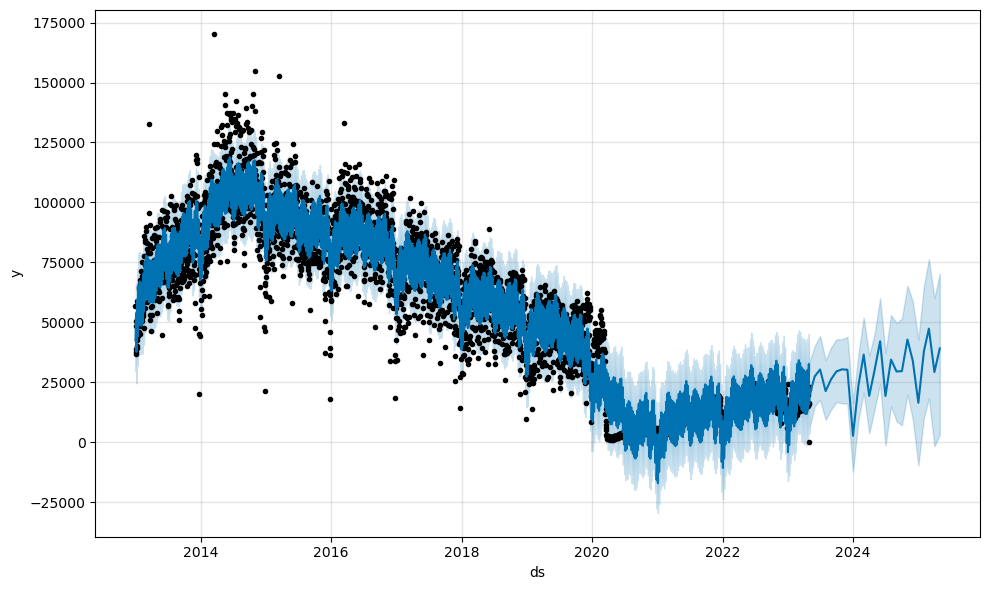

In [114]:
fig1 = m.plot(forecast)

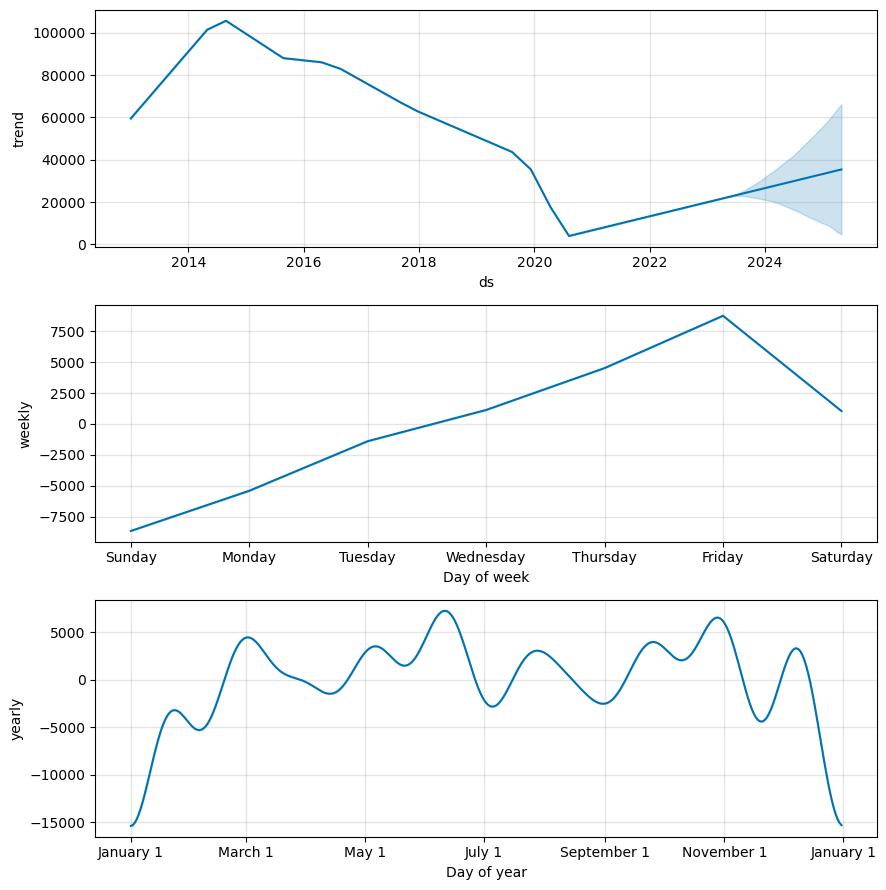

In [115]:
fig2 = m.plot_components(forecast)

In [116]:
from prophet.plot import plot_plotly, plot_components_plotly

In [117]:
plot_plotly(m,forecast)

In [118]:
plot_components_plotly(m,forecast)

C:\Users\Hp\anaconda3\lib\site-packages\plotly\io\_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.

